<a href="https://colab.research.google.com/github/rpolea/CE888/blob/main/Lab_8/Lab_8_transfer_learning_FE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
!git clone https://github.com/sagihaider/CE888_2021.git

Cloning into 'CE888_2021'...
remote: Enumerating objects: 381, done.
remote: Counting objects: 100% (191/191), done.
remote: Compressing objects: 100% (172/172), done.
remote: Total 381 (delta 120), reused 30 (delta 17), pack-reused 190
Receiving objects: 100% (381/381), 20.57 MiB | 12.68 MiB/s, done.
Resolving deltas: 100% (190/190), done.


In [3]:
# Unzip training data
from zipfile import ZipFile
file_name = "/content/CE888_2021/Lab_8/data.zip"
with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('done')

done


In [4]:
# Get all the paths
data_dir_list = os.listdir('/content/data')
#print(data_dir_list)
path, dirs, files = next(os.walk("/content/data"))
file_count = len(files)
print(file_count)

0


In [5]:
# Make new base directory
original_dataset_dir = 'data/cats'
original_dataset_dir1 = 'data/dogs'
original_dataset_dir2 = 'data/Humans'
original_dataset_dir3 = 'data/horses'
base_dir = '/content/animals1'
os.mkdir(base_dir)

In [6]:
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

In [7]:
import shutil
fnames = ['cat.{}.jpg'.format(i) for i in range(121)]
for fname in fnames:
  try:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dir, fname)
    #print(src,dst)
    shutil.copyfile(src, dst)
  except IOError:
      pass
    
fnames = ['cat.{}.jpg'.format(i) for i in range(121, 163)]
for fname in fnames:
  try:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dir, fname)
    shutil.copyfile(src, dst)
  except IOError:
      pass

fnames = ['cat.{}.jpg'.format(i) for i in range(163, 203)]
for fname in fnames:
  try:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dir, fname)
    shutil.copyfile(src, dst)
  except IOError:
      pass
    
fnames = ['dog.{}.jpg'.format(i) for i in range(121)]
for fname in fnames:
  try:
    src = os.path.join(original_dataset_dir1, fname)
    dst = os.path.join(train_dir, fname)
    shutil.copyfile(src, dst)
  except IOError:
      pass

fnames = ['dog.{}.jpg'.format(i) for i in range(121, 163)]
for fname in fnames:
  try:
    src = os.path.join(original_dataset_dir1, fname)
    dst = os.path.join(validation_dir, fname)
    shutil.copyfile(src, dst)
  except IOError:
      pass

fnames = ['dog.{}.jpg'.format(i) for i in range(163, 203)]
for fname in fnames:
  try:
    src = os.path.join(original_dataset_dir1, fname)
    dst = os.path.join(test_dir, fname)
    shutil.copyfile(src, dst)
  except IOError:
      pass

fnames = ['horse-{}.jpg'.format(i) for i in range(121)]
for fname in fnames:
  try:
    src = os.path.join(original_dataset_dir3, fname)
    dst = os.path.join(train_dir, fname)
    #print(src,dst)
    shutil.copyfile(src, dst)
  except IOError:
      pass
    
fnames = ['horse-{}.jpg'.format(i) for i in range(121, 163)]
for fname in fnames:
  try:
    src = os.path.join(original_dataset_dir3, fname)
    dst = os.path.join(validation_dir, fname)
    shutil.copyfile(src, dst)
  except IOError:
      pass

fnames = ['horse-{}.jpg'.format(i) for i in range(163, 203)]
for fname in fnames:
  try:
    src = os.path.join(original_dataset_dir3, fname)
    dst = os.path.join(test_dir, fname)
    shutil.copyfile(src, dst)
  except IOError:
      pass
    
fnames = ['rider-{}.jpg'.format(i) for i in range(121)]
for fname in fnames:
  try:
    src = os.path.join(original_dataset_dir2, fname)
    dst = os.path.join(train_dir, fname)
    shutil.copyfile(src, dst)
  except IOError:
      pass

fnames = ['rider-{}.jpg'.format(i) for i in range(121, 163)]
for fname in fnames:
  try:
    src = os.path.join(original_dataset_dir2, fname)
    dst = os.path.join(validation_dir, fname)
    shutil.copyfile(src, dst)
  except IOError:
      pass

fnames = ['rider-{}.jpg'.format(i) for i in range(163, 203)]
for fname in fnames:
  try:
    src = os.path.join(original_dataset_dir2, fname)
    dst = os.path.join(test_dir, fname)
    shutil.copyfile(src, dst)
  except IOError:
      pass

In [8]:
import cv2
import numpy as np
from random import shuffle

IMG_SIZE = 224
LR = 1e-4

In [9]:
def label_img(img):
    word_label = img.split('.')[0]
    word_label1 = img.split('-')[0]
    if word_label == 'dog': return [1,0,0,0]
    elif word_label == 'cat': return [0,1,0,0]
    elif word_label1 == 'horse': return [0,0,1,0]
    elif word_label1 == 'rider': return [0,0,0,1]

In [10]:
def createDataSplitSet(datapath):
    X=[]
    y=[]

    for img in os.listdir(datapath):
        label = label_img(img)
        # print(label)
        path = os.path.join(datapath, img)
        image = cv2.resize(cv2.imread(path), (IMG_SIZE, IMG_SIZE))
        image = cv2.normalize(image, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)

        X.append(np.array(image))
        y.append(label)

    return np.array(X), np.array(y)

In [11]:
train_X, train_y = createDataSplitSet(train_dir)
val_X, val_y = createDataSplitSet(validation_dir)
test_X, test_y = createDataSplitSet(test_dir)

In [12]:
## VGG 16
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import Model

img_input = Input(shape=(IMG_SIZE, IMG_SIZE, 3))

In [13]:
model = VGG16(
    include_top=True,
    weights="imagenet",
    input_tensor=img_input,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax")
model.summary()

553467904/553467096 [==============================] - 6s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
____________________________________________________________

In [14]:
last_layer = model.get_layer('fc2').output
out = Dense(4, activation='softmax', name='output')(last_layer)  ## 2 classes
model = Model(img_input, out)

for layer in model.layers[:-1]:
	layer.trainable = False

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [15]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

In [16]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
my_callbacks = [
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
    ModelCheckpoint(filepath='vgg16_model.h5', save_best_only=True),
]

In [17]:
history = model.fit(train_X, train_y,
                               batch_size=10,
                               epochs=10, 
                               validation_data=(val_X, val_y),
                               callbacks=my_callbacks)

Epoch 1/10
48/48 [==============================] - 20s 49ms/step - loss: 1.6686 - acc: 0.3080 - val_loss: 0.6992 - val_acc: 0.7560
Epoch 2/10
48/48 [==============================] - 1s 28ms/step - loss: 0.6486 - acc: 0.7557 - val_loss: 0.4982 - val_acc: 0.8690
Epoch 3/10
48/48 [==============================] - 1s 28ms/step - loss: 0.5044 - acc: 0.8102 - val_loss: 0.4417 - val_acc: 0.8274
Epoch 4/10
48/48 [==============================] - 1s 27ms/step - loss: 0.4132 - acc: 0.8533 - val_loss: 0.4705 - val_acc: 0.8214
Epoch 5/10
48/48 [==============================] - 1s 26ms/step - loss: 0.4090 - acc: 0.8481 - val_loss: 0.5283 - val_acc: 0.8095
Epoch 6/10
48/48 [==============================] - 1s 27ms/step - loss: 0.4136 - acc: 0.8329 - val_loss: 0.2983 - val_acc: 0.9048
Epoch 7/10
48/48 [==============================] - 1s 28ms/step - loss: 0.3783 - acc: 0.8658 - val_loss: 0.2667 - val_acc: 0.9107
Epoch 8/10
48/48 [==============================] - 1s 27ms/step - loss: 0.2718 - 

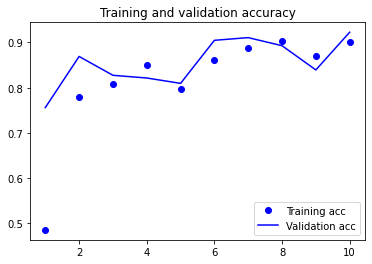

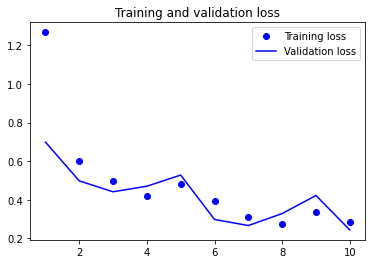

In [18]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [33]:
from sklearn.metrics import accuracy_score
class_labels = ['cat','dog','horse','human']
## Test Accuracy
predictions = model.predict(test_X)
ypred = np.argmax(predictions)

print(classification_report(test_y, pred_labels, target_names= class_labels))

              precision    recall  f1-score   support

         cat       0.91      0.80      0.85        40
         dog       0.84      0.95      0.89        40
       horse       0.95      0.95      0.95        40
       human       0.90      0.90      0.90        40

   micro avg       0.90      0.90      0.90       160
   macro avg       0.90      0.90      0.90       160
weighted avg       0.90      0.90      0.90       160
 samples avg       0.90      0.90      0.90       160

